In [4]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import seaborn as sns
import scipy.stats as stats
import yfinance as yf

code = 'GSPC'
symbol = '^%s' % code
#symbol = 'USDJPY=X'
ticker = yf.Ticker(symbol)
df = ticker.history(period='2y', interval='1wk')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-03-13 00:00:00-04:00,3894.010010,3964.459961,3838.239990,3916.639893,27309950000,0.0,0.0
2023-03-20 00:00:00-04:00,3917.469971,4039.489990,3909.159912,3970.989990,24375960000,0.0,0.0
2023-03-27 00:00:00-04:00,3982.929932,4110.750000,3951.530029,4109.310059,20849370000,0.0,0.0
2023-04-03 00:00:00-04:00,4102.200195,4133.129883,4069.840088,4105.020020,15917210000,0.0,0.0
2023-04-10 00:00:00-04:00,4085.199951,4163.189941,4072.550049,4137.640137,17894880000,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-10 00:00:00-05:00,6046.399902,6127.470215,6003.000000,6114.629883,22510590000,0.0,0.0
2025-02-17 00:00:00-05:00,6121.600098,6147.430176,6008.560059,6013.129883,19495560000,0.0,0.0
2025-02-24 00:00:00-05:00,6026.689941,6043.649902,5837.660156,5954.500000,26733210000,0.0,0.0


In [5]:
df0 = ticker.history(period='5y', interval='1wk')
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-03-16 00:00:00-04:00,2508.590088,2562.979980,2280.520020,2304.919922,41985050000,0.0,0.0
2020-03-23 00:00:00-04:00,2290.709961,2637.010010,2191.860107,2541.469971,37243200000,0.0,0.0
2020-03-30 00:00:00-04:00,2558.979980,2641.389893,2447.489990,2488.649902,30852490000,0.0,0.0
2020-04-06 00:00:00-04:00,2578.280029,2818.570068,2574.570068,2789.820068,27229510000,0.0,0.0
2020-04-13 00:00:00-04:00,2782.459961,2879.219971,2721.169922,2874.560059,27176880000,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-10 00:00:00-05:00,6046.399902,6127.470215,6003.000000,6114.629883,22510590000,0.0,0.0
2025-02-17 00:00:00-05:00,6121.600098,6147.430176,6008.560059,6013.129883,19495560000,0.0,0.0
2025-02-24 00:00:00-05:00,6026.689941,6043.649902,5837.660156,5954.500000,26733210000,0.0,0.0


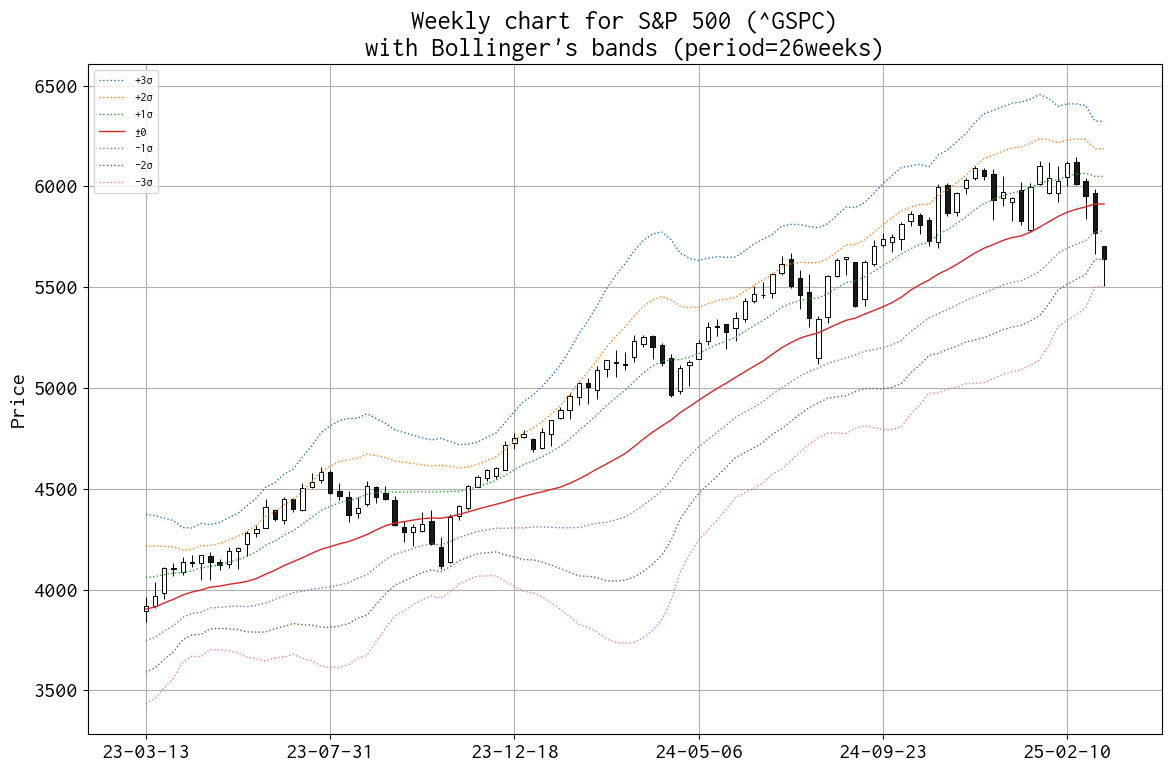

In [6]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(12, 8))

# Bollinger bands
period = 26
r = df0['Close'].rolling(period)    
band_upper3 = r.mean() + 3 * r.std()
band_upper2 = r.mean() + 2 * r.std()
band_upper1 = r.mean() + 1 * r.std()
band_mean = r.mean()
band_lower1 = r.mean() - 1 * r.std()
band_lower2 = r.mean() - 2 * r.std()
band_lower3 = r.mean() - 3 * r.std()

apds  = [
    mpf.make_addplot(band_upper3[df.index], width=1, linestyle='dotted', label='+3σ', ax=ax),
    mpf.make_addplot(band_upper2[df.index], width=1, linestyle='dotted', label='+2σ', ax=ax),
    mpf.make_addplot(band_upper1[df.index], width=1, linestyle='dotted', label='+1σ', ax=ax),
    mpf.make_addplot(band_mean[df.index], width=1, label='±0', ax=ax),
    mpf.make_addplot(band_lower1[df.index], width=1, linestyle='dotted', label='-1σ', ax=ax),
    mpf.make_addplot(band_lower2[df.index], width=1, linestyle='dotted', label='-2σ', ax=ax),
    mpf.make_addplot(band_lower3[df.index], width=1, linestyle='dotted', label='-3σ', ax=ax),
]   

mpf.plot(
    df, type='candle', style='default',
    addplot=apds,
    datetime_format='%y-%m-%d',
    xrotation=0,
    ax=ax,
)

ax.grid()
ax.legend(loc='best', fontsize=9)

try:
    ax.set_title('Weekly chart for %s (%s)\nwith Bollinger\'s bands (period=26weeks)' % (ticker.info['longName'], symbol))
except KeyError:
    ax.set_title('Weekly chart for %s\nwith Bollinger\'s bands (period=26weeks)' % symbol)

plt.tight_layout()
plt.savefig('weekly_chart_bollinger_%s.png' % code)
plt.show()

In [4]:
df.tail(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-03-03 00:00:00+09:00,37617.500000,37874.378906,36813.621094,36887.171875,659400000,0.0,0.0
2025-03-10 00:00:00+09:00,36972.589844,37326.269531,35987.128906,37053.101562,511400000,0.0,0.0


In [5]:
df.tail(2)['Close']

Date
2025-03-03 00:00:00+09:00    36887.171875
2025-03-10 00:00:00+09:00    37053.101562
Name: Close, dtype: float64

In [6]:
df.tail(2)['Close'].diff()

Date
2025-03-03 00:00:00+09:00           NaN
2025-03-10 00:00:00+09:00    165.929688
Name: Close, dtype: float64

In [7]:
df['Close'].tail(1) - df['Open'].tail(1)

Date
2025-03-10 00:00:00+09:00    80.511719
dtype: float64

In [8]:
df['Close'].rolling(13).mean().tail()

Date
2025-02-10 00:00:00+09:00    39154.913161
2025-02-17 00:00:00+09:00    39192.843149
2025-02-24 00:00:00+09:00    39111.879207
2025-03-03 00:00:00+09:00    38942.340745
2025-03-10 00:00:00+09:00    38756.391526
Name: Close, dtype: float64

In [9]:
df['Close'].rolling(26).mean().tail()

Date
2025-02-10 00:00:00+09:00    38764.870643
2025-02-17 00:00:00+09:00    38780.742638
2025-02-24 00:00:00+09:00    38723.348407
2025-03-03 00:00:00+09:00    38742.413912
2025-03-10 00:00:00+09:00    38760.542368
Name: Close, dtype: float64

In [10]:
df['Close'].rolling(52).mean().tail()

Date
2025-02-10 00:00:00+09:00    38787.799129
2025-02-17 00:00:00+09:00    38781.611854
2025-02-24 00:00:00+09:00    38728.624925
2025-03-03 00:00:00+09:00    38674.744742
2025-03-10 00:00:00+09:00    38642.926683
Name: Close, dtype: float64

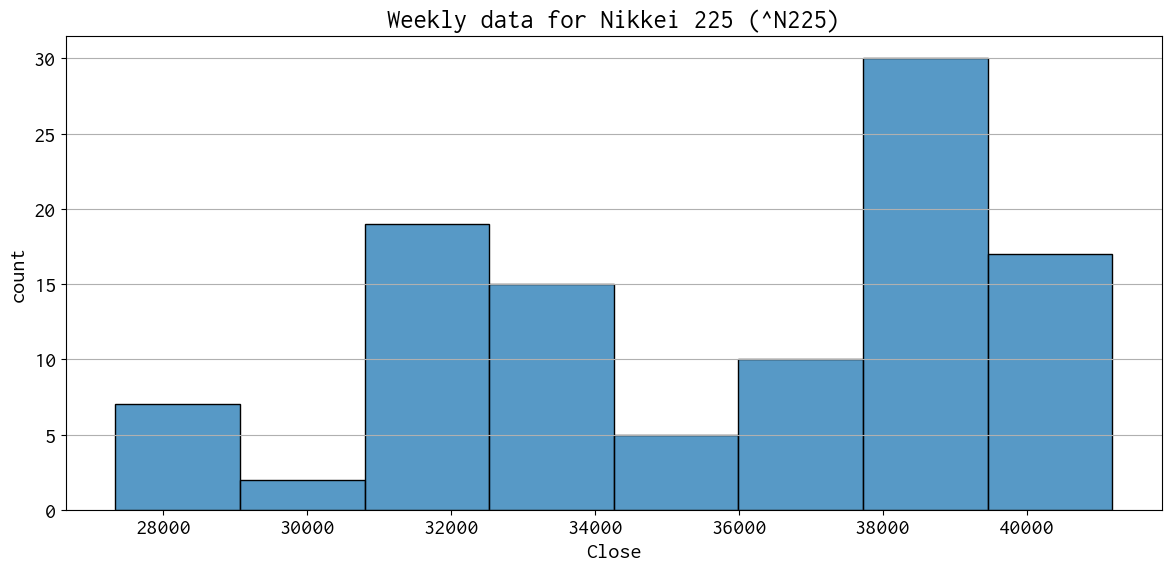

In [11]:
plt.rcParams['font.size'] = 16
fig = plt.figure(figsize=(12, 6))
#ax = fig.add_axes(111)
ax = fig.add_subplot(111)

ax = sns.histplot(
  data = df,
  x = "Close"
)
ax.set_xlabel("Close")
ax.set_ylabel("count")
ax.set_title('Weekly data for %s (%s)' % (ticker.info['longName'], symbol))
ax.grid(axis = 'y')

plt.tight_layout()
plt.savefig('weekly_histogram_%s.png' % code)
plt.show()

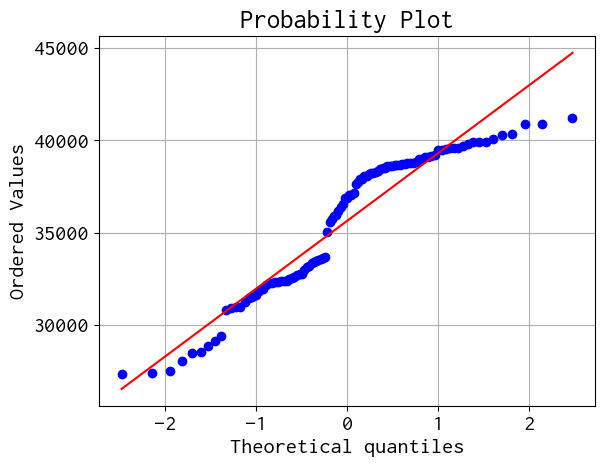

In [12]:
# Q-Qプロットの描画
stats.probplot(df['Close'], dist="norm", plot=plt)
plt.grid()
plt.show()

In [13]:
len(df)

105

In [14]:
W, shapiro_p_value = stats.shapiro(df['Close'])
print(f'Shapiro-Wilk test statistic: {W}, p-value: {shapiro_p_value}')

Shapiro-Wilk test statistic: 0.9112821759754941, p-value: 3.0931445894467853e-06
